In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn 
from tqdm import tqdm_notebook as tqdm
from torch.utils.data import DataLoader,Dataset
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
new_df= pd.read_csv('numaric_data.csv')


class custom_csv_dataset(Dataset):
    def __init__(self,csv_file):
        self.data = csv_file
    def __len__(self):
        return len(self.data)
    def __getitem__(self,idx):
        # all collum expect 'HeartDisease' collum
        columns_to_exclude = ['HeartDisease']

        # Get the column names excluding 'HeartDisease'
        train_column_names = [col for col in self.data.columns if col not in columns_to_exclude]
        #get idx based train and target values
        train_data = self.data[train_column_names].iloc[idx].values
        target_data = self.data['HeartDisease'].iloc[idx]
        #convert to tensor
        train_data_tensor = torch.tensor(train_data,dtype=torch.float32)
        target_data_tensor = torch.tensor(target_data,dtype=torch.float32)
        return train_data_tensor,target_data_tensor
    

train_df, test_df = train_test_split(new_df, test_size=0.1, random_state=42)
        
#reset index on both dataframes
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

test_dataset = custom_csv_dataset(test_df)
test_loader = DataLoader(test_dataset,batch_size=1,shuffle=True)

#evalute model

model = nn.Sequential(
    nn.Linear(17, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 1),
    nn.Sigmoid()
)

# Move model to the specified device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


#load model
model.load_state_dict(torch.load('model_epoch12.pt'))

#evalute model
model.eval()
y_pred_list = []
y_true_list = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.round(y_test_pred)
        y_pred_list.append(y_test_pred.cpu().numpy())
        y_true_list.append(y_batch.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
y_true_list = [a.squeeze().tolist() for a in y_true_list]

print(classification_report(y_true_list, y_pred_list))
print(confusion_matrix(y_true_list, y_pred_list))



              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93     29112
         1.0       0.25      0.22      0.24      2868

    accuracy                           0.87     31980
   macro avg       0.59      0.58      0.58     31980
weighted avg       0.86      0.87      0.87     31980

[[27165  1947]
 [ 2224   644]]


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn 
from tqdm import tqdm_notebook as tqdm
from torch.utils.data import DataLoader,Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


from sklearn.metrics import confusion_matrix, classification_report
new_df= pd.read_csv('numaric_data.csv')
# Specify the columns you want to scale
columns_to_scale = ['PhysicalHealth', 'MentalHealth', 'GenHealth','SleepTime']

# Fit and transform the specified columns
new_df[columns_to_scale] = scaler.fit_transform(new_df[columns_to_scale])

class custom_csv_dataset(Dataset):
    def __init__(self,csv_file):
        self.data = csv_file
    def __len__(self):
        return len(self.data)
    def __getitem__(self,idx):
        # all collum expect 'HeartDisease' collum
        columns_to_exclude = ['HeartDisease']

        # Get the column names excluding 'HeartDisease'
        train_column_names = [col for col in self.data.columns if col not in columns_to_exclude]
        #get idx based train and target values
        train_data = self.data[train_column_names].iloc[idx].values
        target_data = self.data['HeartDisease'].iloc[idx]
        #convert to tensor
        train_data_tensor = torch.tensor(train_data,dtype=torch.float32)
        target_data_tensor = torch.tensor(target_data,dtype=torch.float32)
        return train_data_tensor,target_data_tensor
    

test_dataset = custom_csv_dataset(test_df)
test_loader = DataLoader(new_df,batch_size=1,shuffle=False)


In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn 
from tqdm import tqdm_notebook as tqdm
from torch.utils.data import DataLoader,Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


from sklearn.metrics import confusion_matrix, classification_report
new_df= pd.read_csv('numaric_data.csv')
# Specify the columns you want to scale
columns_to_scale = ['PhysicalHealth', 'MentalHealth', 'GenHealth','SleepTime']

# Fit and transform the specified columns
new_df[columns_to_scale] = scaler.fit_transform(new_df[columns_to_scale])

class custom_csv_dataset(Dataset):
    def __init__(self,csv_file):
        self.data = csv_file
    def __len__(self):
        return len(self.data)
    def __getitem__(self,idx):
        # all collum expect 'HeartDisease' collum
        columns_to_exclude = ['HeartDisease']

        # Get the column names excluding 'HeartDisease'
        train_column_names = [col for col in self.data.columns if col not in columns_to_exclude]
        #get idx based train and target values
        train_data = self.data[train_column_names].iloc[idx].values
        target_data = self.data['HeartDisease'].iloc[idx]
        #convert to tensor
        train_data_tensor = torch.tensor(train_data,dtype=torch.float32)
        target_data_tensor = torch.tensor(target_data,dtype=torch.float32)
        return train_data_tensor,target_data_tensor
    

train_df, test_df = train_test_split(new_df, test_size=0.1, random_state=42)
        
#reset index on both dataframes
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

test_dataset = custom_csv_dataset(test_df)
test_loader = DataLoader(test_dataset,batch_size=1,shuffle=True)

#evalute model

model = nn.Sequential(
    nn.Linear(17, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 1),
    nn.Sigmoid()
)

# Move model to the specified device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


#load model
model.load_state_dict(torch.load('model_epoch9.pt'))

#evalute model
model.eval()
y_pred_list = []
y_true_list = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.round(y_test_pred)
        y_pred_list.append(y_test_pred.cpu().numpy())
        y_true_list.append(y_batch.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
y_true_list = [a.squeeze().tolist() for a in y_true_list]



              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     29112
         1.0       0.61      0.04      0.07      2868

    accuracy                           0.91     31980
   macro avg       0.76      0.52      0.51     31980
weighted avg       0.89      0.91      0.87     31980

[[29044    68]
 [ 2762   106]]


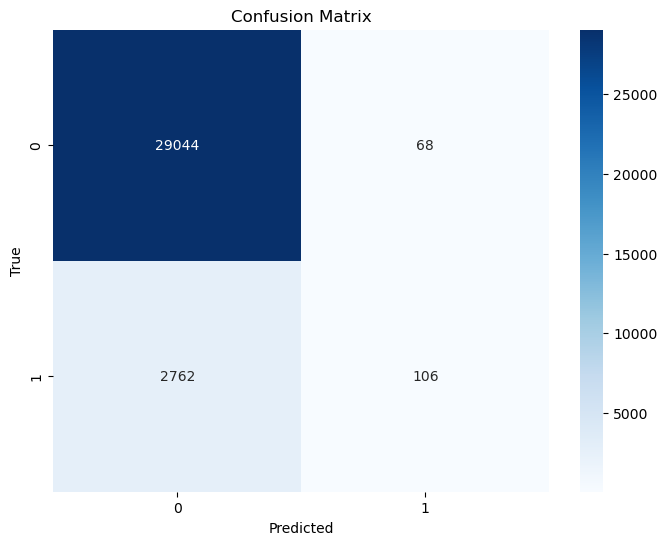

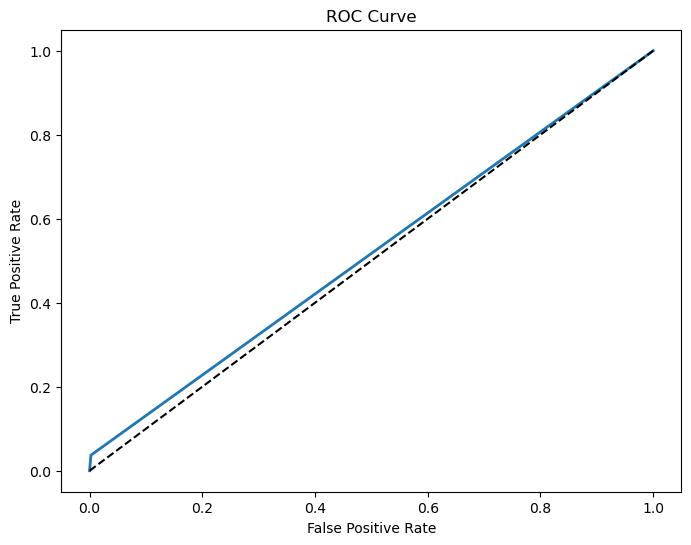

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,auc

y_pred_array = np.array(y_pred_list)
y_true_array = np.array(y_true_list)



# Classification Report
report = classification_report(y_true_array, y_pred_array)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_array, y_pred_array)
print(conf_matrix)


# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_true_array, y_pred_array)
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()




              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     29112
         1.0       0.57      0.06      0.10      2868

    accuracy                           0.91     31980
   macro avg       0.74      0.53      0.53     31980
weighted avg       0.88      0.91      0.88     31980

[[28991   121]
 [ 2708   160]]


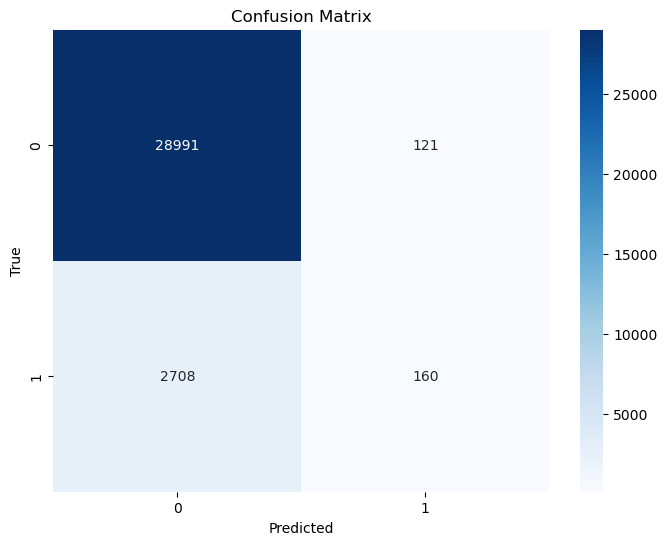

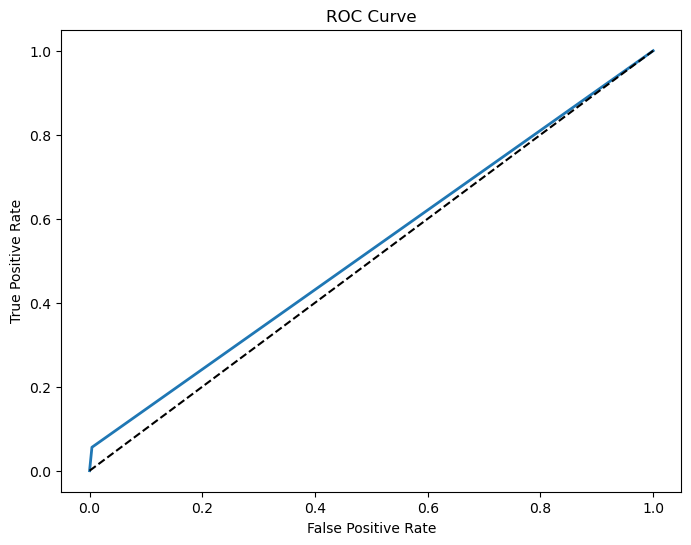

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,auc

y_pred_array = np.array(y_pred_list)
y_true_array = np.array(y_true_list)



# Classification Report
report = classification_report(y_true_array, y_pred_array)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_array, y_pred_array)
print(conf_matrix)


# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_true_array, y_pred_array)
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()




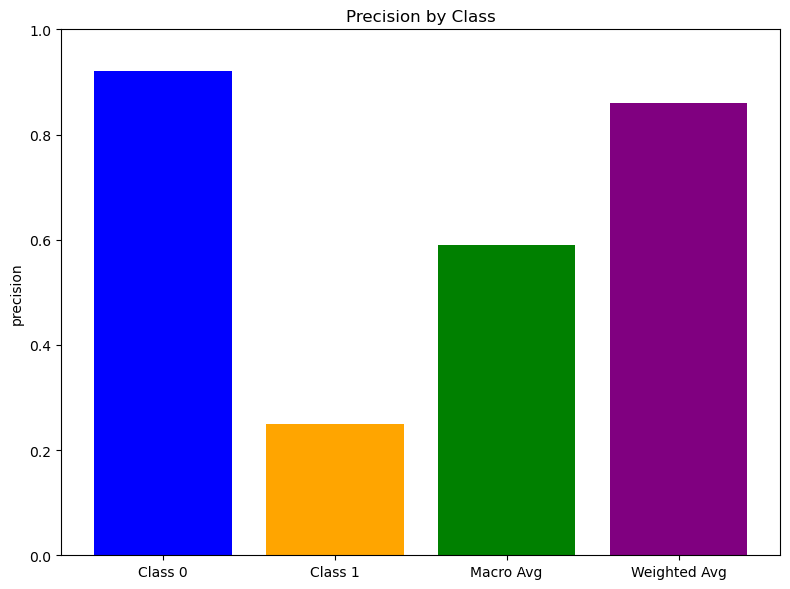

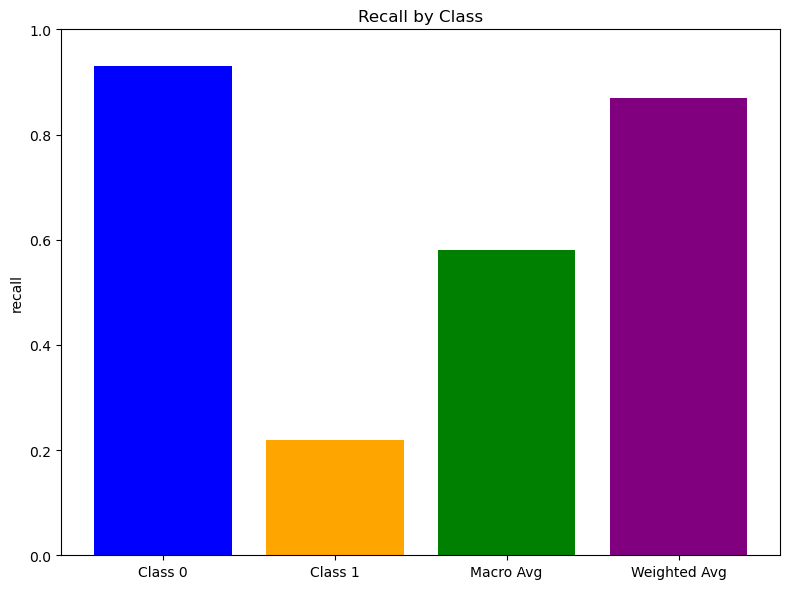

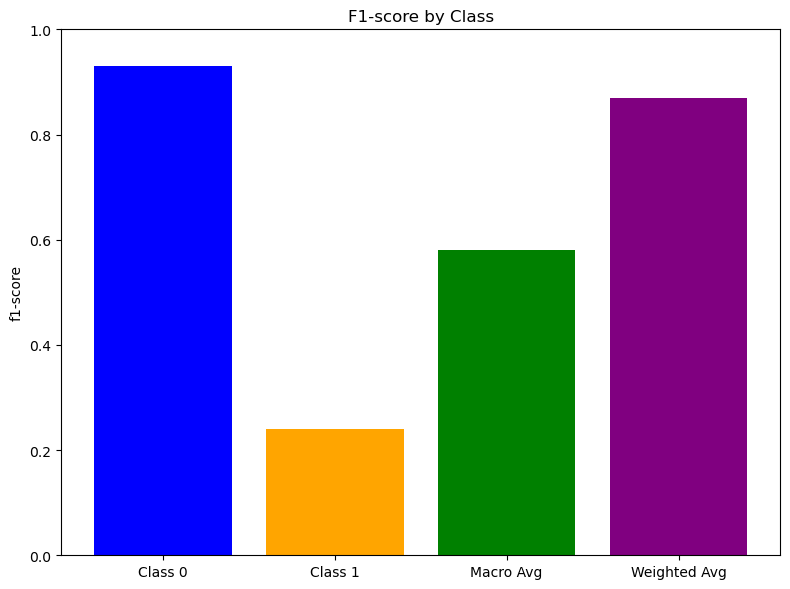

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Sample classification report data (replace with your actual values)
class_labels = ['Class 0', 'Class 1', 'Macro Avg', 'Weighted Avg']
precision = [0.92, 0.25, 0.59, 0.86]
recall = [0.93, 0.22, 0.58, 0.87]
f1_score = [0.93, 0.24, 0.58, 0.87]

# Metrics to plot
metrics_to_plot = ['precision', 'recall', 'f1-score']

# Plot each metric as a separate bar plot
for metric in metrics_to_plot:
    plt.figure(figsize=(8, 6))
    if metric == 'precision':
        values = precision
    elif metric == 'recall':
        values = recall
    elif metric == 'f1-score':
        values = f1_score
    plt.bar(class_labels, values, color=['blue', 'orange', 'green', 'purple'])
    plt.title(f'{metric.capitalize()} by Class')
    plt.ylabel(metric)
    plt.ylim(0, 1.0)  # Set y-axis limit to match metric range
    plt.tight_layout()
    plt.show()


In [7]:
from collections import Counter

# Count the occurrences of unique values
value_counts = Counter(y_pred_list)
value_counts

Counter({0.0: 29389, 1.0: 2591})

In [13]:
from collections import Counter

# Count the occurrences of unique values
value_counts = Counter(y_pred_list)
value_counts

Counter({1.0: 2775, 0.0: 29205})

In [ ]:
from collections import Counter

# Count the occurrences of unique values
value_counts = Counter(y_true_list)
value_counts

In [11]:
def count_value_changes(list1, list2):
    change_count = {}

    for val1, val2 in zip(list1, list2):
        if val1 != val2:
            change_count[val1] = change_count.get(val1, 0) + 1
            change_count[val2] = change_count.get(val2, 0) + 1

    # Add values that appear only in one of the lists
    remaining_values = set(list1) ^ set(list2)
    for val in remaining_values:
        change_count[val] = change_count.get(val, 0) + 1

    return change_count


# Count the changes and their occurrences
changes = count_value_changes(y_true_list, y_pred_list)

for value, count in changes.items():
    print(f"{value} changed {count} times")


0.0 changed 4171 times
1.0 changed 4171 times


In [9]:
def count_different_indices(list1, list2):
    count = 0
    min_length = min(len(list1), len(list2))

    for i in range(min_length):
        if list1[i] != list2[i]:
            count += 1
    
    # Add the remaining elements if the lists have different lengths
    count += abs(len(list1) - len(list2))

    return count
# Count the different indices
different_count = count_different_indices(y_true_list, y_pred_list)
different_count


4171

In [3]:
y_true_list


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0